# Evaluation and Comparison

## sr_mats_pre is the predicted outcome

In [13]:
mse_hicGAN_norm=map(compare_mse,hr_mats_test[:,:,:,0],sr_mats_pre[:,:,:,0])
psnr_hicGAN_norm=map(calculate_psnr,hr_mats_test[:,:,:,0],sr_mats_pre[:,:,:,0])
ssim_hicGAN_norm=map(calculate_ssim,hr_mats_test[:,:,:,0],sr_mats_pre[:,:,:,0])
np.median(mse_hicGAN_norm)
np.median(psnr_hicGAN_norm)
np.median(ssim_hicGAN_norm)

/home/liuqiao/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


0.019148212020000423

14.560460842143709

0.24753643106770698

In [22]:
#Best for hicPlus
mse_hicPlus=map(compare_mse,Y_test_crop,Y_pre)
psnr_hicPlus=map(calculate_psnr,Y_test_crop,Y_pre)
ssim_hicPlus=map(calculate_ssim,Y_test_crop,Y_pre)
np.median(mse_hicPlus)
np.median(psnr_hicPlus)
np.median(ssim_hicPlus)

17.342128202329857

12.999959273493769

0.27598158962572117

## Record the sample subscripts with the same genomic distance (offset)

In [17]:

ind_0,ind_40,ind_80,ind_120,ind_160=[],[],[],[],[]
for i in range(len(distance_all)):
    if not (Y_test_crop[i]==0).all():
        if abs(distance_all[i][0])==0:
            ind_0.append(i)
        elif abs(distance_all[i][0])==40:
            ind_40.append(i)
        elif abs(distance_all[i][0])==80:
            ind_80.append(i)
        elif abs(distance_all[i][0])==120:
            ind_120.append(i)
        elif abs(distance_all[i][0])==160:
            ind_160.append(i)
        else:
            print 'error'

## Group the metrices according to the offset

In [18]:
data_mse_hicGAN_norm = [np.array(mse_hicGAN_norm)[ind_0],np.array(mse_hicGAN_norm)[ind_40],np.array(mse_hicGAN_norm)[ind_80],np.array(mse_hicGAN_norm)[ind_120],np.array(mse_hicGAN_norm)[ind_160]]
data_psnr_hicGAN_norm = [np.array(psnr_hicGAN_norm)[ind_0],np.array(psnr_hicGAN_norm)[ind_40],np.array(psnr_hicGAN_norm)[ind_80],np.array(psnr_hicGAN_norm)[ind_120],np.array(psnr_hicGAN_norm)[ind_160]]
data_ssim_hicGAN_norm = [np.array(ssim_hicGAN_norm)[ind_0],np.array(ssim_hicGAN_norm)[ind_40],np.array(ssim_hicGAN_norm)[ind_80],np.array(ssim_hicGAN_norm)[ind_120],np.array(ssim_hicGAN_norm)[ind_160]]

In [19]:
data_mse_hicPlus = [np.array(mse_hicPlus)[ind_0],np.array(mse_hicPlus)[ind_40],np.array(mse_hicPlus)[ind_80],np.array(mse_hicPlus)[ind_120],np.array(mse_hicPlus)[ind_160]]
data_psnr_hicPlus = [np.array(psnr_hicPlus)[ind_0],np.array(psnr_hicPlus)[ind_40],np.array(psnr_hicPlus)[ind_80],np.array(psnr_hicPlus)[ind_120],np.array(psnr_hicPlus)[ind_160]]
data_ssim_hicPlus = [np.array(ssim_hicPlus)[ind_0],np.array(ssim_hicPlus)[ind_40],np.array(ssim_hicPlus)[ind_80],np.array(ssim_hicPlus)[ind_120],np.array(ssim_hicPlus)[ind_160]]

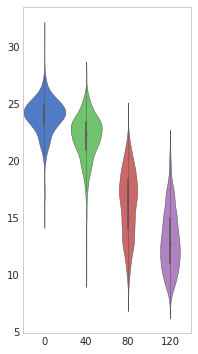

In [355]:
data={}
data['dis']=['0']*len(ind_0)+['40']*len(ind_40)+['80']*len(ind_80)+['120']*len(ind_120)
data['mse'] = np.concatenate([np.array(mse_hicGAN_norm)[ind_0],np.array(mse_hicGAN_norm)[ind_40],np.array(mse_hicGAN_norm)[ind_80],np.array(mse_hicGAN_norm)[ind_120]],axis=0)
data['psnr'] = np.concatenate([np.array(psnr_hicGAN_norm)[ind_0],np.array(psnr_hicGAN_norm)[ind_40],np.array(psnr_hicGAN_norm)[ind_80],np.array(psnr_hicGAN_norm)[ind_120]],axis=0)
data['ssim'] = np.concatenate([np.array(ssim_hicGAN_norm)[ind_0],np.array(ssim_hicGAN_norm)[ind_40],np.array(ssim_hicGAN_norm)[ind_80],np.array(ssim_hicGAN_norm)[ind_120]],axis=0)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(3,6), sharey=True)
axes = sns.violinplot(x="dis", y="psnr",palette='muted',width=1,saturation=0.85,linewidth=0.5,data=data,order=['0','40','80','120'])
axes.grid(False)
#plt.savefig('fig/boxplot_psnr2.pdf')
plt.show()

## Use a dic to record pairs of true value and predicted value with the same genomic distance

In [42]:
#distance_all = [[offset,chrom],[offset,chrom],...,[offset,chrom]]
#hr_mats_test: true test samples
#sr_mats_pre: predicted test samples
dic_norm={}
for i in range(200):
    dic_norm[i]=[[],[]]#true and pre
for i in range(len(distance_all)):
    for j in range(-39,40,1):
        dis = distance_all[i][0]-j
        dic_norm[abs(dis)][0]+=hr_mats_test[i,:,:,0].diagonal(offset=j).tolist()
        dic_norm[abs(dis)][1]+=sr_mats_pre[i,:,:,0].diagonal(offset=j).tolist()

In [43]:
dic_hicPlus_norm={}
for i in range(200):
    dic_hicPlus_norm[i]=[[],[]]#true and pre
for i in range(len(distance_all)):
    for j in range(-27,28,1):
        dis = distance_all[i][0]-j
        dic_hicPlus_norm[abs(dis)][0]+=Y_test_crop_norm[i].diagonal(offset=j).tolist()
        dic_hicPlus_norm[abs(dis)][1]+=Y_pre_norm[i].diagonal(offset=j).tolist()

In [44]:
dic_baseline={}
for i in range(200):
    dic_baseline[i]=[[],[]]#true and pre
for i in range(len(distance_all)):
    for j in range(-27,28,1):
        dis = distance_all[i][0]-j
        dic_baseline[abs(dis)][0]+=hr_mats_test[i,:,:,0].diagonal(offset=j).tolist()
        dic_baseline[abs(dis)][1]+=lr_mats_test[i,:,:,0].diagonal(offset=j).tolist()

In [55]:
hr_mats_test.shape
lr_mats_test.shape

(6623, 40, 40, 1)

(6623, 40, 40, 1)

In [46]:
dic_gassian={}
for i in range(200):
    dic_gassian[i]=[[],[]]#true and pre
for i in range(len(distance_all)):
    for j in range(-27,28,1):
        dis = distance_all[i][0]-j
        dic_gassian[abs(dis)][0]+=hr_mats_test[i,:,:,0].diagonal(offset=j).tolist()
        dic_gassian[abs(dis)][1]+=lr_mats_test_gaussian_blur[i].diagonal(offset=j).tolist()

In [171]:
dic_rep={}
for i in range(200):
    dic_rep[i]=[[],[]]#true and pre
for i in range(len(distance_all)):
    for j in range(-27,28,1):
        dis = distance_all[i][0]-j
        dic_rep[abs(dis)][0]+=hr_mats_test[i,:,:,0].diagonal(offset=j).tolist()
        dic_rep[abs(dis)][1]+=hr_mats_test_rep[i,:,:,0].diagonal(offset=j).tolist()

In [91]:
dic_hicPlus={}
for i in range(200):
    dic_hicPlus[i]=[[],[]]#true and pre
for i in range(len(distance_all)):
    if i in filter_idx:
        for j in range(-27,28,1):#the size of sample of hicPlus is 28x28
            dis = distance_all[i][0]-j
            dic_hicPlus[abs(dis)][0]+=Y_test_crop[i].diagonal(offset=j).tolist()
            dic_hicPlus[abs(dis)][1]+=Y_pre[i].diagonal(offset=j).tolist()

In [47]:
y=[]
y_baseline=[]
y_gaussian=[]
y_hicPlus=[]
#y_rep=[]
for i in range(200):
    y.append(scipy.stats.pearsonr(dic_norm[i][0],dic_norm[i][1])[0])
    y_hicPlus.append(scipy.stats.pearsonr(dic_hicPlus_norm[i][0],dic_hicPlus_norm[i][1])[0])
    y_baseline.append(scipy.stats.pearsonr(dic_baseline[i][0],dic_baseline[i][1])[0])
    y_gaussian.append(scipy.stats.pearsonr(dic_gassian[i][0],dic_gassian[i][1])[0])
    #y_rep.append(scipy.stats.pearsonr(dic_rep[i][0],dic_rep[i][1])[0])
    
    

/home/liuqiao/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:3033: RuntimeWarning: Mean of empty slice.
  mx = x.mean()
/home/liuqiao/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/liuqiao/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:3034: RuntimeWarning: Mean of empty slice.
  my = y.mean()
/home/liuqiao/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:3038: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


In [48]:
mannwhitneyu(y[:100],y_hicPlus[:100],alternative='greater')

MannwhitneyuResult(statistic=6965.0, pvalue=7.931797403600585e-07)

(0.3, 1)

Text(0.5,0,'Genomic distance(10kb)')

Text(0,0.5,'Pearson r')

(0, 100)

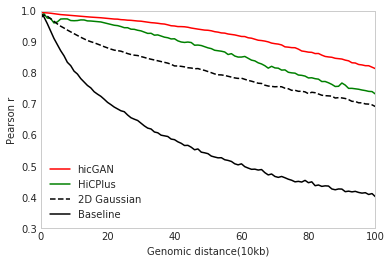

In [1174]:
import seaborn as sns
sns.set_style("whitegrid") 
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 4), sharey=True)
axes.grid(False)
axes.plot(list(range(200)),y,'r',label='hicGAN')
axes.plot(list(range(200)),y_hicPlus,'g',label='HiCPlus')
axes.plot(list(range(200)),y_gaussian,'k',linestyle='dashed',label='2D Gaussian')
#axes.plot(list(range(200)),y_rep,'k',linestyle='dashed',label='Biological Rep2')
axes.plot(list(range(200)),y_baseline,'k',label='Baseline')

plt.ylim(0.3,1)
plt.xlabel('Genomic distance(10kb)')
plt.ylabel('Pearson r')
plt.xlim(0,100)
plt.legend()
#plt.savefig('fig/comparison_pearson.pdf')
plt.show()